In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

There are 891 entries.  

Most probably removing / not useful:
* PassengerId - 891 unique values, but need it in output so use as index
* Name - 891 unique values
* Ticket - probably not useful, TBD - look at values to see if can get anthing from it

Y - dependent variable:
* Survived - only 2 possible values, numeric, so probably nothing to do

Useful as is:
* SibSp - number siblings / spouces.  No Nulls, 7 unique values, but double check that distribution makes sense. 
* Parch - number children / parents.  No Nulls, 7 unique values, but double check that distribution makes sense. 
* Fare - seems already float, no nulls.  Double check distributation make sure can be used as is.

Useful (probably manipulation needed):
* Pclass - no nulls, 3 unique values, int, check if categorical or not, and need to do some manipulation.  A proxy for socio-economic status (SES) (1 -high, 3 - low).  Numeric, decide if to turn into fully categorical
* Sex - no nulls, 2 string values
* Embarked - port of embarkation, 3 values (C = Cherbourg, Q = Queenstown, S = Southampton). 2 values missing, fill in? How?

Special values to take into consideration due to missing values / number unique values:
* Age - TBD understand when missing, what's common about missing entries, and if can replace with some age to continue using this column. Seem no obvious outliers, from age almost 0 to 80.
* Cabin - TBD - 204 non unique values, out of which 147 unique - look into different values to understand if useful


In [6]:
df['Ticket'].values

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '349909', '347077', '2631', '19950', '330959', '349216',
       'PC 17601', 'PC 17569', '335677', 'C.A. 24579', 'PC 17604',
       '113789', '2677', 'A./5. 2152', '345764', '2651', '7546', '11668',
       '349253', 'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371',
       '14311', '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572',
       '2926', '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651',
       'CA 2144', '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'CA 2144', 'S.O.C. 14879', '2680', '1601', '348123', '349208',
       '374746', '248738', '364516', '345767', '345779', '330932',
       '113059',

Don't see anything interesting / useful, any kind of pattern.  Decided not to use **'Ticket'**

In [7]:
df[df['Cabin'].isnull() == False]['Cabin'].values

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73',
       'C23 C25 C27', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60',
       'E101', 'D26', 'F E69', 'D47', 'C123', 'B86', 'F2', 'C2', 'E33',
       'B19', 'A7', 'C49', 'F4', 'A32', 'F2', 'B4', 'B80', 'G6', 'A31',
       'D36', 'D15', 'C93', 'C83', 'C78', 'D35', 'G6', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'B58 B60', 'E101', 'C22 C26', 'C65', 'E36',
       'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'D', 'B18', 'C124',
       'C91', 'C2', 'E40', 'T', 'F2', 'C23 C25 C27', 'F33', 'C128', 'E33',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'D36', 'G6', 'C78', 'E10',
       'C52', 'E44', 'B96 B98', 'C23 C25 C27', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'D', 'A14', 'B49', 'C93', 'B37',
       'C30', 'D20', 'C22 C26', 'B79', 'C65', 'E25', 'D46', 'F33', 'B73',


At first stage, not use **'Cabin'**, later need to understand if we know something more significant about it

In [8]:
titanic = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [10]:
titanic.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'], dtype=object)

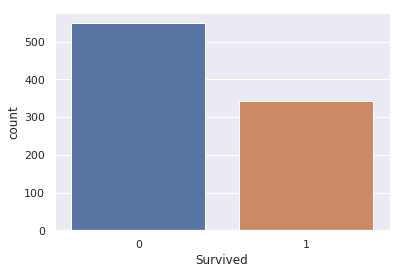

In [11]:
sns.countplot(titanic['Survived'])

Only slightly more than a half survived

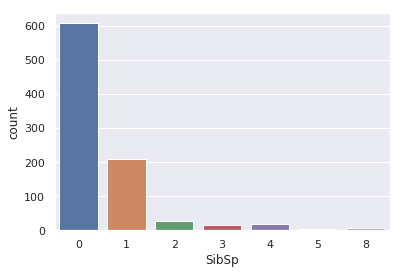

In [12]:
sns.countplot(titanic['SibSp'])

2/3 of people (~600) had no siblings or spouces, ~200 had 1 (presumably mostly spouses)

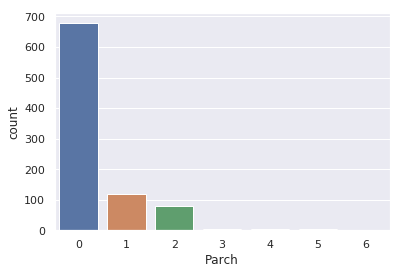

In [13]:
sns.countplot(titanic['Parch'])

> 2/3 had no parents / children, ~200 had 1-2

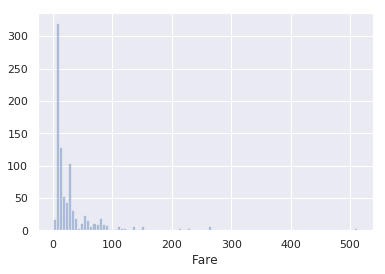

In [14]:
sns.distplot(titanic['Fare'], bins=100, kde=False)

Vast majority of the people paid very little (under 30), there are some that paid 0 (who is that?), but very few paid a lot 300, 400, 500 etc.  
The distributation is not normal, will it cause issues later?
Should we remove any outliers? 

In [15]:
titanic['Fare'].value_counts().sort_index().head(60)

0.0000    15
4.0125     1
5.0000     1
6.2375     1
6.4375     1
6.4500     1
6.4958     2
6.7500     2
6.8583     1
6.9500     1
6.9750     2
7.0458     1
7.0500     7
7.0542     2
7.1250     4
7.1417     1
7.2250    12
7.2292    15
7.2500    13
7.3125     1
7.4958     3
7.5208     1
7.5500     4
7.6292     1
7.6500     4
7.7250     1
7.7292     1
7.7333     4
7.7375     2
7.7417     1
7.7500    34
7.7750    16
7.7875     1
7.7958     6
7.8000     1
7.8292     2
7.8542    13
7.8750     1
7.8792     4
7.8875     1
7.8958    38
7.9250    18
8.0292     1
8.0500    43
8.1125     1
8.1375     1
8.1583     1
8.3000     1
8.3625     1
8.4042     1
8.4333     1
8.4583     1
8.5167     1
8.6542     1
8.6625    13
8.6833     1
8.7125     1
8.8500     1
9.0000     2
9.2167     1
Name: Fare, dtype: int64

In [16]:
titanic['Fare'].value_counts().sort_index(ascending=False).head(10)

512.3292    3
263.0000    4
262.3750    2
247.5208    2
227.5250    4
221.7792    1
211.5000    1
211.3375    3
164.8667    2
153.4625    3
Name: Fare, dtype: int64

We don't have a reason to believe that some of the values above are no real (outliers that should be removed), although they might cause a lot of issues since they are many magnitues above the smallest values

In [17]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Seems that there are enough values to make each one of them a reference category

Replace Pclass with 2 dummy values:

In [18]:
titanic['pclass_1'] = titanic['Pclass'].apply(lambda cl: 1 if cl == 1 else 0)
titanic['pclass_2'] = titanic['Pclass'].apply(lambda cl: 1 if cl == 2 else 0)
titanic.drop('Pclass', axis=1, inplace=True)

In [19]:
titanic['Male'] = titanic['Sex'].map({'male': 1, 'female':0})
titanic.drop('Sex', axis=1, inplace=True)

In [20]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,pclass_1,pclass_2,Male
PassengerId,,,,,,,,,
1,0,22.0,1,0,7.2500,S,0,0,1
2,1,38.0,1,0,71.2833,C,1,0,0
3,1,26.0,0,0,7.9250,S,0,0,0
4,1,35.0,1,0,53.1000,S,1,0,0
5,0,35.0,0,0,8.0500,S,0,0,1


In [21]:
titanic['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

We see that vast majority embarred in S, therefore:
* Chances are it's not going to help to add this feature anyways
* 2 NaN values can be replaced with 'S'.  Decided not to remove these 2 lines not to lose information from these 2 lines for category that chances are will not help anyways

In [22]:
titanic['Embarked_S'] = titanic['Embarked'].map({np.NaN: 1, 'S': 1, 'C': 0, 'Q': 0})
titanic['Embarked_S'].sum()

646

In [23]:
titanic['Embarked_Q'] = titanic['Embarked'].map({np.NaN: 0, 'S': 0, 'C': 0, 'Q': 1})
titanic['Embarked_Q'].sum()


77

In [24]:
titanic.drop('Embarked', axis=1, inplace=True)

In [25]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,pclass_1,pclass_2,Male,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,1,0
2,1,38.0,1,0,71.2833,1,0,0,0,0
3,1,26.0,0,0,7.9250,0,0,0,1,0
4,1,35.0,1,0,53.1000,1,0,0,1,0
5,0,35.0,0,0,8.0500,0,0,1,1,0


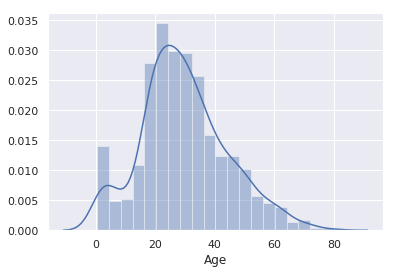

In [26]:
sns.distplot(titanic[titanic['Age'].isnull() == False]['Age'])

In [27]:
mean_age = titanic['Age'].mean()
mean_age

29.69911764705882

In [28]:
test = pd.read_csv('/kaggle/input/titanic/test.csv', index_col='PassengerId')
test['Age'].value_counts(dropna=False)

NaN     86
24.0    17
21.0    17
22.0    16
30.0    15
        ..
60.5     1
26.5     1
76.0     1
67.0     1
34.5     1
Name: Age, Length: 80, dtype: int64

The average age is almost 30, and it's missing for 177 (20%). A few options:
1. Not use **'Age'** category
2. Replace missing values with mean()
3. Replace missing values with some better value than mean - TBD
4. Remove observations with missing Age - doesn't help since also in test we have missing values
Guessing that this category is too important to drop together, so will try with mean for now, TBD - think if there is a better way

In [29]:
titanic['Age'].replace({np.NaN: mean_age}, inplace=True)


In [30]:
titanic['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

We see that 177 values of age were replaced with 29.699

In [31]:
y_train = titanic['Survived']
X_train_none_standarized = titanic.drop('Survived', axis=1)
X_train_none_standarized.head()

,Age,SibSp,Parch,Fare,pclass_1,pclass_2,Male,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,1,0
2,38.0,1,0,71.2833,1,0,0,0,0
3,26.0,0,0,7.9250,0,0,0,1,0
4,35.0,1,0,53.1000,1,0,0,1,0
5,35.0,0,0,8.0500,0,0,1,1,0


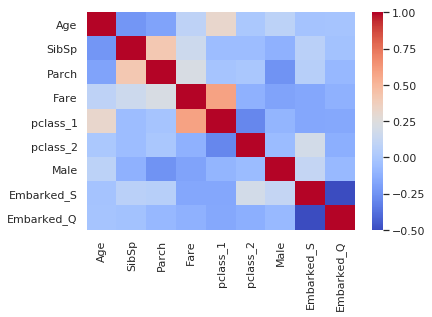

In [32]:
sns.heatmap(pd.DataFrame(X_train_none_standarized).corr(), cmap='coolwarm')

Correlations (positive):
* Fare and pclass_1 - persumably high class and expensive fare go together.  We might need to leave only one of them for linear regressions etc.
* Slight: Age and pclass_1 - presumabely only adults and older people buy 1st class tickets
* Slight: SibSp and Parch - presumabely those who traveled as part of family have more of a chance to have other family members

Correlations (negative):
* Embarked_S and Embarked_Q - since the other 3rd category ('C') is not that big, if not one, then usually the other

In [33]:
X_train_none_standarized.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'pclass_1', 'pclass_2', 'Male',
       'Embarked_S', 'Embarked_Q'],
      dtype='object')

There are a few ways to deal with standartization:
1. Not to standardise
2. To standardise all columns including dummy 0/1 columns.  Easier, might give better results, but worse for interpretation
3. To standardise only columns that are not dummy 0/1, but have much larger range: 'Age', 'SibSp', 'Parch', 'Fare' 
Currently going with #2, but might change later - TBD 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_all_standarized = scaler.fit_transform(X_train_none_standarized)
pd.DataFrame(X_train_all_standarized).describe()


,0,1,2,3,4,5,6,7,8
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.562796e-16,3.456519e-16,6.716164e-17,-4.373606e-17,9.930951e-17,1.413011e-16,-4.059603e-16,-2.093350e-16,-4.017238e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.253155e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-5.656854e-01,-5.101515e-01,-1.355574e+00,-1.623803e+00,-3.075623e-01
25%,-5.924806e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-5.656854e-01,-5.101515e-01,-1.355574e+00,-1.623803e+00,-3.075623e-01
50%,0.000000e+00,-4.745452e-01,-4.736736e-01,-3.573909e-01,-5.656854e-01,-5.101515e-01,7.376951e-01,6.158384e-01,-3.075623e-01
75%,4.079260e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,-5.656854e-01,-5.101515e-01,7.376951e-01,6.158384e-01,-3.075623e-01
max,3.870872e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.767767e+00,1.960202e+00,7.376951e-01,6.158384e-01,3.251373e+00


In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_all_standarized, y_train)
log_reg.score(X_train_all_standarized, y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8047138047138047

In [36]:
log_reg.coef_[0]

array([-0.49521798, -0.34844616, -0.07725474,  0.12107703,  0.90141   ,
        0.48463254, -1.28267986, -0.19508929, -0.00925048])

In [37]:
X_train_none_standarized.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'pclass_1', 'pclass_2', 'Male',
       'Embarked_S', 'Embarked_Q'],
      dtype='object')

In [38]:
coefs = pd.DataFrame(log_reg.coef_[0], index=X_train_none_standarized.columns).sort_values(by=0)
coefs

,0
Male,-1.282680
Age,-0.495218
SibSp,-0.348446
Embarked_S,-0.195089
Parch,-0.077255
Embarked_Q,-0.009250
Fare,0.121077
pclass_2,0.484633
pclass_1,0.901410


Finished with a very basic model. Initial conclusions:
1. Females had a high chance of survival
2. First class had a high chance of survival
3. Children/younger people had a high chance of survival
4. The less number of siblings / spouce you had - more of a chance of survival
5. If you embarked not from Southampton - your chance was higher
6. Higher fare you paid, the higher chance of survival slightly - although it probably gets almost fully explained by fare
7. The following don't seem to make much of a difference: number of parents/children, and whether you embarked from Queenstown


In [39]:
test.columns.values

array(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'], dtype=object)

In [40]:
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [42]:
test['Age'].replace({np.NaN: mean_age}, inplace=True)

In [43]:
test[test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1044,3,male,60.5,0,0,NaN,S


In [44]:
mean_class_3_fare = titanic[(titanic['pclass_1'] == 0) & (titanic['pclass_2'] == 0)]['Fare'].mean()
mean_class_3_fare

13.675550101832997

In [45]:
test['Fare'].replace({np.NaN: mean_class_3_fare}, inplace=True)

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [47]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [48]:
test['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [49]:
test['pclass_1'] = test['Pclass'].apply(lambda cl: 1 if cl == 1 else 0)
test['pclass_2'] = test['Pclass'].apply(lambda cl: 1 if cl == 2 else 0)
test.drop('Pclass', axis=1, inplace=True)

In [50]:
test['pclass_1'].sum()

107

In [51]:
test['pclass_2'].sum()

93

In [52]:
test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [53]:
test['Male'] = test['Sex'].map({'male': 1, 'female':0})
test.drop('Sex', axis=1, inplace=True)

In [54]:
test['Male'].sum()

266

In [55]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [56]:
test['Embarked_S'] = test['Embarked'].map({np.NaN: 1, 'S': 1, 'C': 0, 'Q': 0})
test['Embarked_S'].sum()

270

In [57]:
test['Embarked_Q'] = test['Embarked'].map({np.NaN: 0, 'S': 0, 'C': 0, 'Q': 1})
test['Embarked_Q'].sum()

46

In [58]:
test.drop('Embarked', axis=1, inplace=True)

In [59]:
X_test_all_standarized = scaler.transform(test)

In [60]:
preds = log_reg.predict(X_test_all_standarized)


In [61]:
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
pred_df = test.copy()
pred_df['Survived'] = preds

In [63]:
pred_df.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'pclass_1', 'pclass_2', 'Male',
       'Embarked_S', 'Embarked_Q', 'Survived'],
      dtype='object')

In [64]:
pred_df.drop(['Age', 'SibSp', 'Parch', 'Fare', 'pclass_1', 'pclass_2', 'Male','Embarked_S', 'Embarked_Q'], axis=1, inplace=True)
pred_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [65]:
pred_df.to_csv('/kaggle/working/preds.csv')